Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [49]:
%matplotlib inline
from operator import itemgetter

import chap01soln


Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [43]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
resp = chap01soln.ReadFemResp()
resp.columns

Display the histogram.

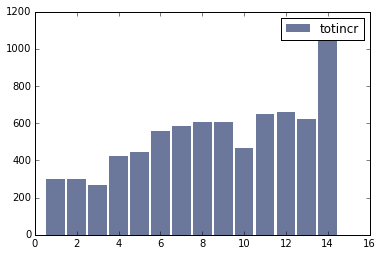

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

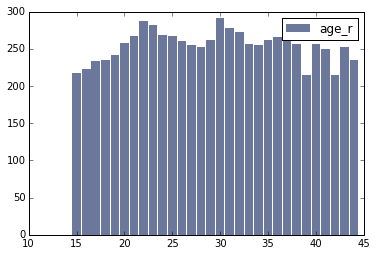

In [4]:
hist2 = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist2, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

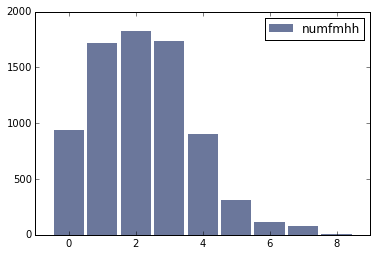

In [5]:
hist3 = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist3, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

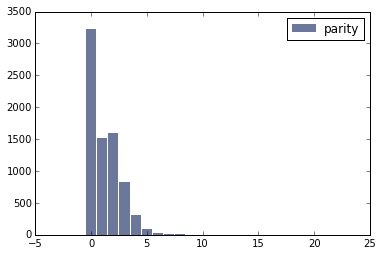

In [6]:
hist4 = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist4, label='parity')
thinkplot.Show()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
hist4.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

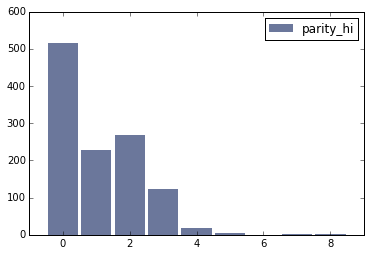

In [9]:
hist5 = thinkstats2.Hist(resp.parity[resp.totincr == 14])
thinkplot.Hist(hist5, label='parity_hi')
thinkplot.Show()

Find the largest parities for high income respondents.

In [10]:
hist5.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [11]:
hi_par = resp.parity[resp.totincr == 14]
par = resp.parity
hi_par.mean(), par.mean()

(1.0758620689655172, 1.2232107811068953)

Investigate any other variables that look interesting.

In [12]:
hi_par.std(), par.std()

(1.1761668844433986, 1.389721983997953)

In [34]:
def Mode(h):
    max = 0
    for i in h:
        if h.Freq(i) > h.Freq(max):
            max = i
    return max

In [42]:
def AllModes(h):
    hist = h.Copy()
    result = []
    while len(hist) > 0:
        max = Mode(hist)
        result.append((max, hist.Freq(max)))
        hist.Remove(max)
    return result

In [47]:
def AllModes2(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


In [51]:
%timeit AllModes(hist2)
%timeit AllModes2(hist2)

1000 loops, best of 3: 1.39 ms per loop
10000 loops, best of 3: 30.8 µs per loop


In [52]:
%timeit?